In [50]:

import numpy as np
from os import path
import time
import copy


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from scipy.stats import zscore

In [51]:
#FACTOR
Dir='VarianceMaps/'

Feat=pd.read_csv(Dir+'CCy.csv')
Cat=pd.read_csv('C:/Users/Rashmi/WorkingLibs/idgan-master_Jan/outputs/TraversalLoop/BGL.csv')

Feat=Feat.loc[(Feat!=0).any(axis=1)]

sns.set(font_scale = 5)


In [52]:
normed_matrix = zscore(Feat)
normalized_df= pd.DataFrame(normed_matrix, columns=Feat.columns)
normalized_df=normalized_df.dropna(1)


C:\Users\Kevin Tsia\AppData\Local\Temp\ipykernel_11736\3086402915.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  normalized_df=normalized_df.dropna(1)


C:\Users\Kevin Tsia\AppData\Local\Temp\ipykernel_11736\3072841073.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  normalized_df=normalized_df.dropna(1)


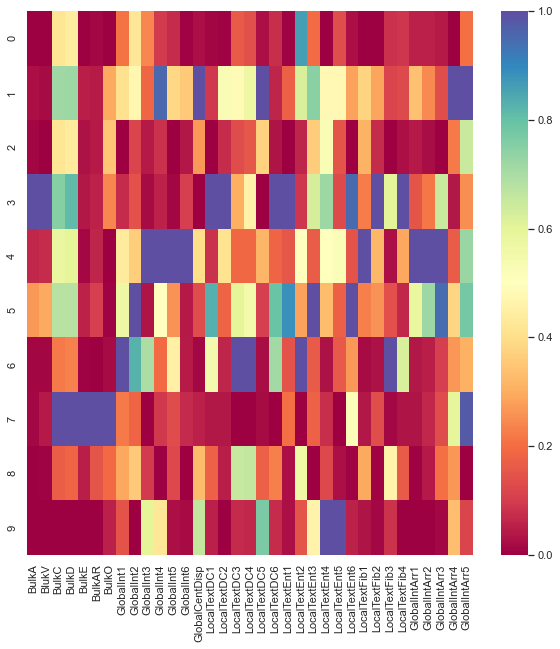

In [53]:
sns.set(font_scale = 1 )
from scipy.stats import zscore
#C_10dim=pd.DataFrame(cdim_gan)
#normed_matrix = zscore(Feat)
plt.figure(figsize=(10,10))

# copy the data
df_min_max_scaled = Feat.copy()
  
# apply Row Scaling technique
for column in Feat.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
sns.heatmap(df_min_max_scaled, cmap='Spectral')
normalized_df= pd.DataFrame(df_min_max_scaled, columns=Feat.columns)
normalized_df=normalized_df.dropna(1)


In [54]:

xs = np.arange(0, 10)
ys = np.arange(0, 3)
colors = ["red", "purple", "green"]


In [55]:
Attr1=['BulkA', 'BlukV', 'BulkC', 'BulkD', 'BulkE', 'BulkO', 'BulkAR'] 
#Attr1=[]
Attr2=['GlobalInt1','GlobalInt2', 'GlobalInt3','GlobalInt4', 'GlobalInt5','GlobalInt6',
       
       'GlobalCentDisp', 'GlobalIntArr1', 'GlobalIntArr2', 'GlobalIntArr3', 'GlobalIntArr4','GlobalIntArr5']
Attr3=[#'LocalTextFit1','LocalTextFit2', 'LocalTextFit3', 'LocalTextFit4',
     'LocalTextDC1', 'LocalTextDC2', 'LocalTextDC3',
      'LocalTextDC4', 'LocalTextDC5', 'LocalTextDC6', 'LocalTextEnt1', 'LocalTextEnt2', 'LocalTextEnt3', 'LocalTextEnt4',
      'LocalTextEnt5', 'LocalTextEnt6', 'LocalTextFib1', 'LocalTextFib2', 'LocalTextFib3', 'LocalTextEnt4']
import array
Attr=[Attr1, Attr2, Attr3]


In [56]:
ColorCat=[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
#ColorCat=['Bulk', 'Bulk', 'Bulk', 'Bulk', 'Bulk', 'Bulk', 'Bulk', 'Global', 'Global',  'Global',  'Global',  'Global',  'Global',  'Global',  'Global',  'Global',  'Global',  'Global',  'Global', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local', 'Local']

Features=['BulkA', 'BlukV', 'BulkC', 'BulkD', 'BulkE', 'BulkO', 'BulkAR','GlobalInt1','GlobalInt2', 'GlobalInt3','GlobalInt4', 'GlobalInt5','GlobalInt6',
       'GlobalCentDisp', 'GlobalIntArr1', 'GlobalIntArr2', 'GlobalIntArr3', 'GlobalIntArr4','GlobalIntArr5','LocalTextDC1', 'LocalTextDC2', 'LocalTextDC3',
      'LocalTextDC4', 'LocalTextDC5', 'LocalTextDC6', 'LocalTextEnt1', 'LocalTextEnt2', 'LocalTextEnt3', 'LocalTextEnt4',
      'LocalTextEnt5', 'LocalTextEnt6', 'LocalTextFib1', 'LocalTextFib2', 'LocalTextFib3', 'LocalTextFib4']
ColorCat=np.array(ColorCat)
Features=pd.Series(Features)
FeatList=list(Features)

#Species=pd.DataFrame(Species)
cat = dict(zip(np.unique(ColorCat), ["red", "purple", "green"]))
col_colors = pd.Series(ColorCat).map(cat)

In [57]:
ColorCat1=pd.DataFrame(ColorCat, columns=['Category'])
ColorCat2=pd.DataFrame(ColorCat, columns=['Category'])
sp = ColorCat1.pop("Category")

#ColorCat2=ColorCat2.transpose()

<Figure size 3600x3600 with 0 Axes>

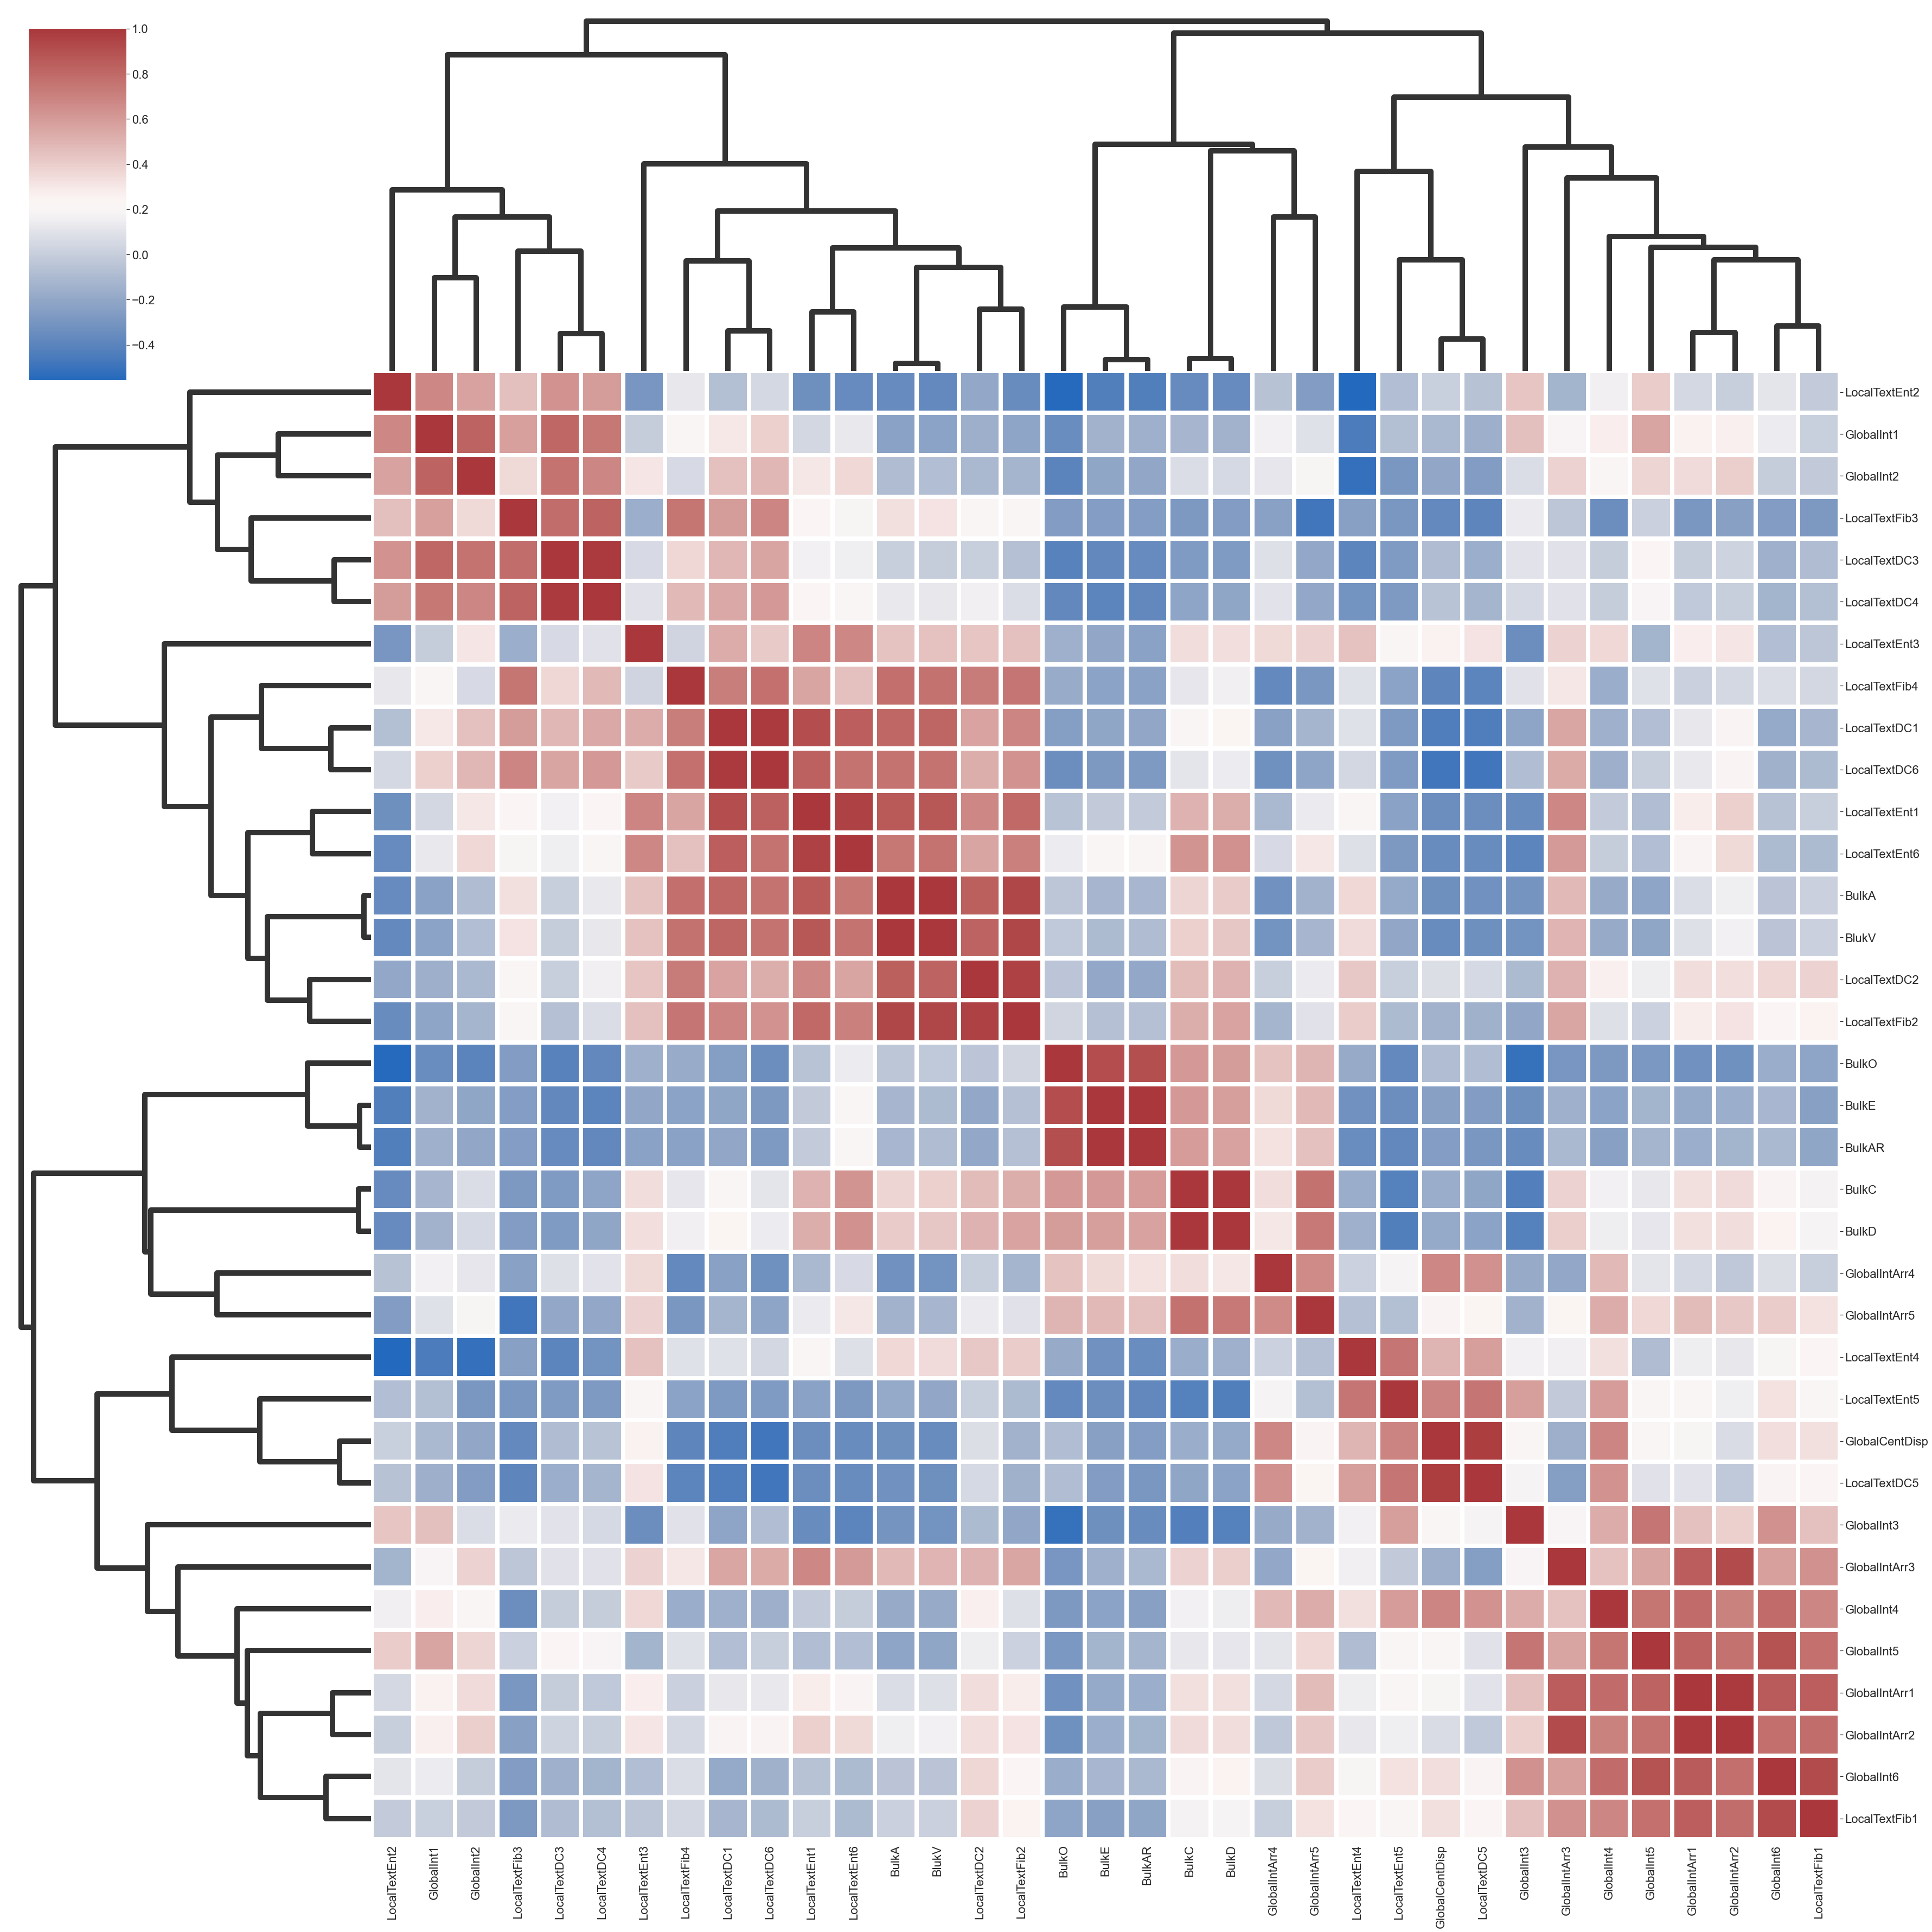

In [58]:

CorrMat=normalized_df.corr(method ='pearson')

#corrmat=normed_matrix.corr(method ='pearson')

sns.set(font_scale = 2 )
plt.figure(figsize=(50,50))
g=sns.clustermap(CorrMat, figsize=(50,50),xticklabels=Feat.columns,linewidths=8,tree_kws=dict(linewidths=10),cmap="vlag")
#g=sns.clustermap(normalized_df, figsize=(120,120),xticklabels=Feat.columns,linewidths=8,tree_kws=dict(linewidths=10))

In [59]:
sns.set(font_scale = 24)
# First Remove non useful rows
col_colors = sp.map(cat)
#g1 = sns.clustermap(normalized_df, col_colors=col_colors)
 
g1=sns.clustermap(normalized_df, figsize=(150,150),xticklabels=Feat.columns, fmt='d',linewidths=20,tree_kws=dict(linewidths=30), cmap="YlGnBu")
for tick_label in g1.ax_heatmap.axes.get_xticklabels():
    tick_text = tick_label.get_text()
    FeatInd = FeatList.index(tick_text)
    tick_label.set_color(col_colors[FeatInd])